# About The Dataset :

* age: Age of the patient

* sex: Sex of the patient

* cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

* trtbps: Resting blood pressure (in mm Hg)

* chol: Cholestoral in mg/dl fetched via BMI sensor

* fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

* restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

* thalachh: Maximum heart rate achieved

* oldpeak: Previous peak

* slp: Slope

* caa: Number of major vessels

* thall: Thalium Stress Test result ~ (0,3)

* exng: Exercise induced angina ~ 1 = Yes, 0 = No

* output: Target variable

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('sample_data/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2.0,0.0,2.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       334 non-null    int64  
 1   sex       334 non-null    int64  
 2   cp        334 non-null    int64  
 3   trtbps    327 non-null    float64
 4   chol      325 non-null    float64
 5   fbs       334 non-null    int64  
 6   restecg   334 non-null    int64  
 7   thalachh  318 non-null    float64
 8   exng      334 non-null    int64  
 9   oldpeak   330 non-null    float64
 10  slp       333 non-null    float64
 11  caa       333 non-null    float64
 12  thall     332 non-null    float64
 13  output    334 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 36.7 KB


## Checking statistical data

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,334.000000,334.000000,334.000000,327.000000,325.000000,334.000000,334.000000,318.000000,334.000000,330.000000,333.000000,333.000000,332.000000,334.000000
mean,54.125749,0.697605,0.967066,131.250765,245.055385,0.143713,0.532934,149.773585,0.317365,1.032121,1.402402,0.729730,2.313253,0.547904
std,9.176402,0.459985,1.011403,17.317624,51.433194,0.351324,0.523151,22.842742,0.466149,1.156664,0.616241,1.029206,0.610635,0.498447
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.750000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Deleting null values

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Checking for datatypes of the attributes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 332
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    float64
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    float64
 11  caa       302 non-null    float64
 12  thall     302 non-null    float64
 13  output    302 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 35.4 KB


In [ ]:
df.nunique().sort_values()

sex           2
fbs           2
exng          2
output        2
restecg       3
slp           3
cp            4
thall         4
caa           5
oldpeak      40
age          41
trtbps       49
thalachh     91
chol        152
dtype: int64

## Removing the duplicates

In [ ]:
df[df.duplicated()]
df.drop_duplicates(keep='first',inplace=True)

## Computing the correlation matrix

In [ ]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

In [ ]:
df_corr = df[con_cols].corr().transpose()

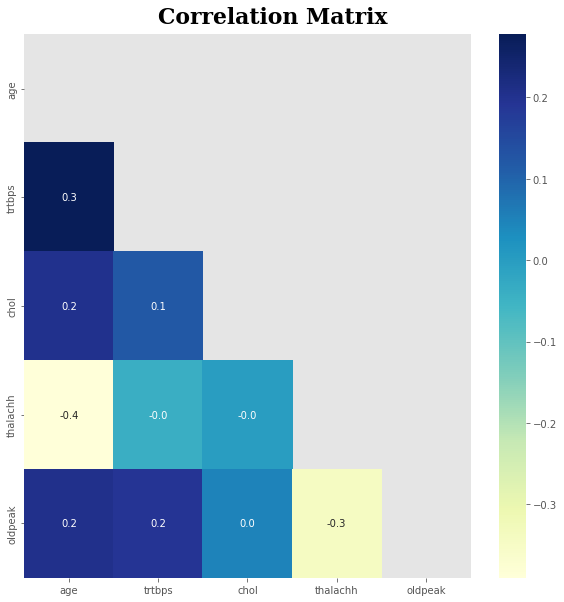

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

## Data Visualization¶

In [ ]:
px.scatter(df,x="age",y="chol",color="output",title="Influence Age and cholesterol")

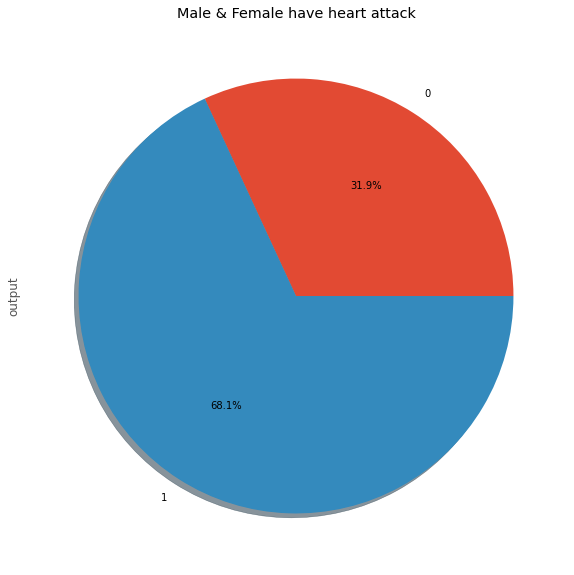

In [ ]:
df.groupby('sex')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Male & Female have heart attack")

### Gender of the patients
* 1 = 68.3% are male,
* 0 = 31.7% are female

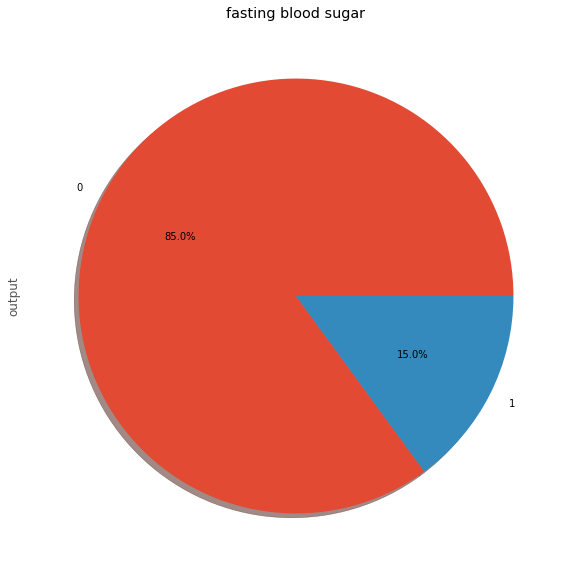

In [ ]:
df.groupby('fbs')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")

### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)¶
* 0 = 85.1 %
* 1 = 14.9 %

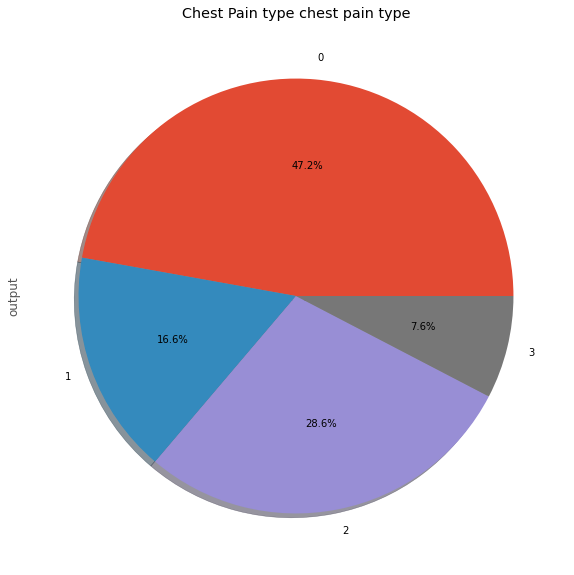

In [ ]:
df.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Chest Pain type chest pain type")

### cp : Chest Pain type chest pain type
* 0 : asymptomatic 47.2%
* 1 : typical angina 16.5%
* 2 : atypical angina 28.7 %
* 3 : non-anginal pain 7.6 %

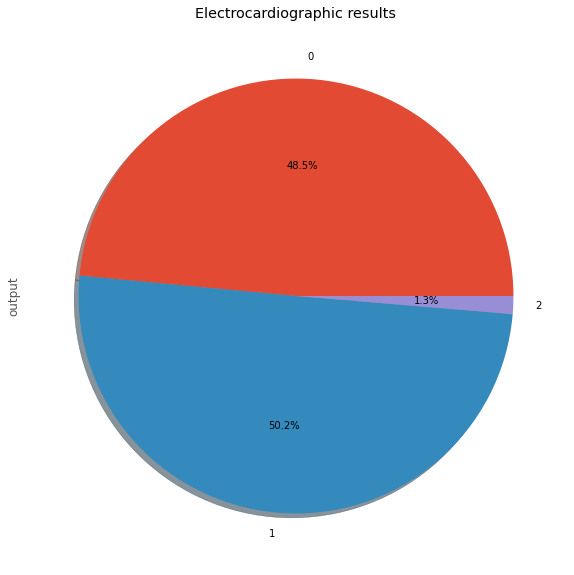

In [ ]:
df.groupby('restecg')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(10,10),title="Electrocardiographic results")

### rest_ecg : resting electrocardiographic results
* Value 0: normal = 48.5%
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST * elevation or depression of > 0.05 mV) = 50.2 %
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria = 1.3 %

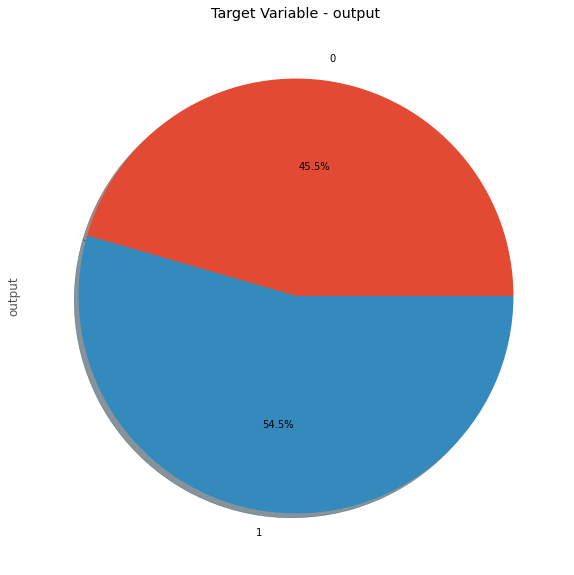

In [ ]:
df.groupby('output')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Target Variable - output")

### Target Variable - output¶
* More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent .

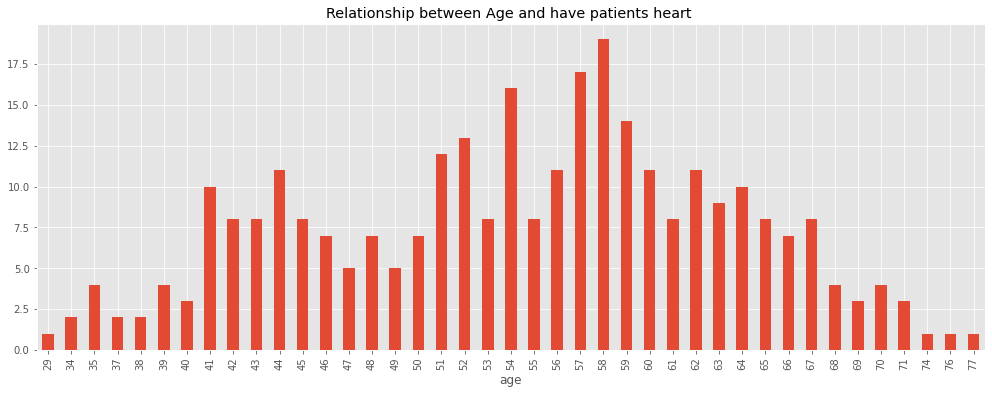

In [ ]:
df.groupby('age')["output"].count().plot(kind="bar",figsize=(17,6), title="Relationship between Age and have patients heart ")

### Age Variable
* The vast majority of patients are between 50 and 60.

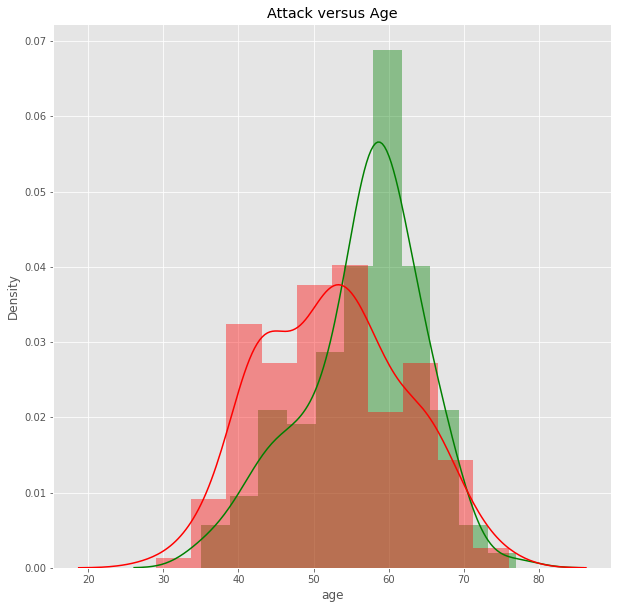

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(df[df['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

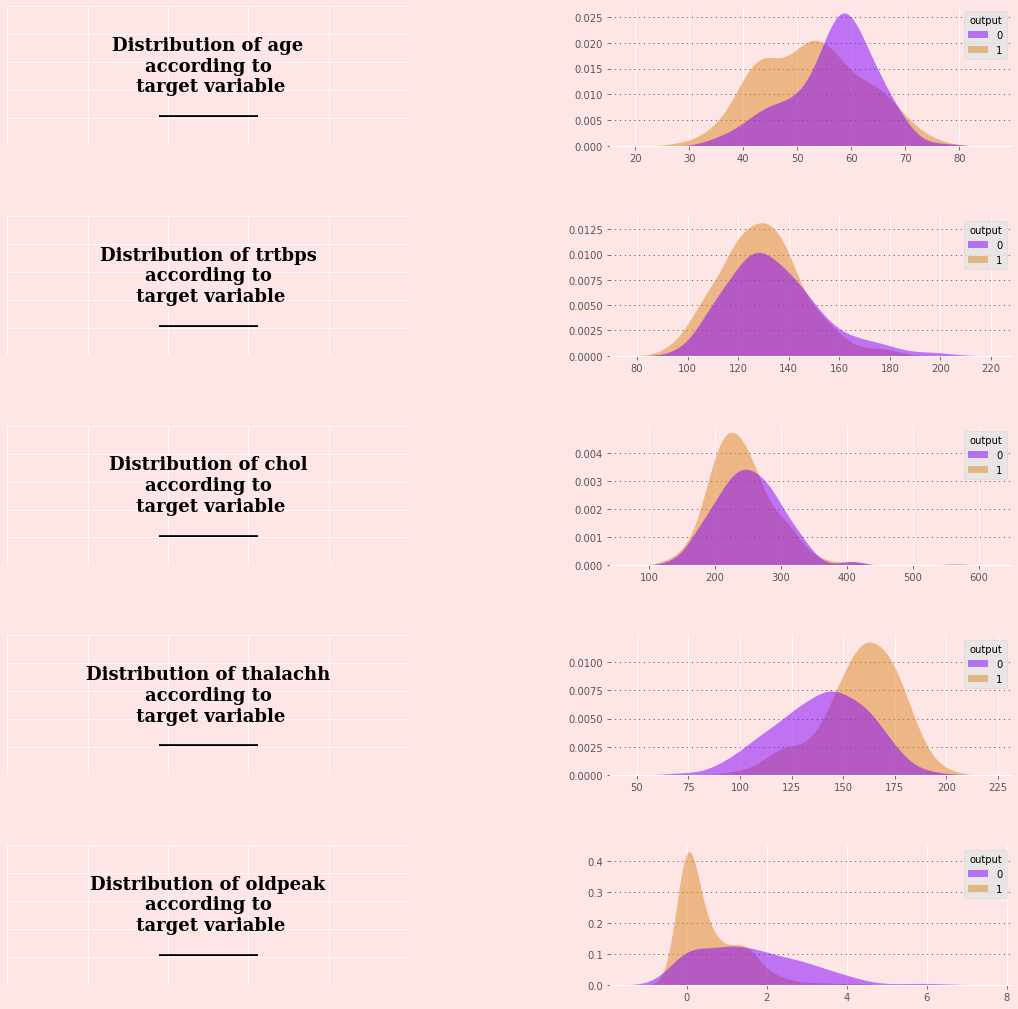

In [ ]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

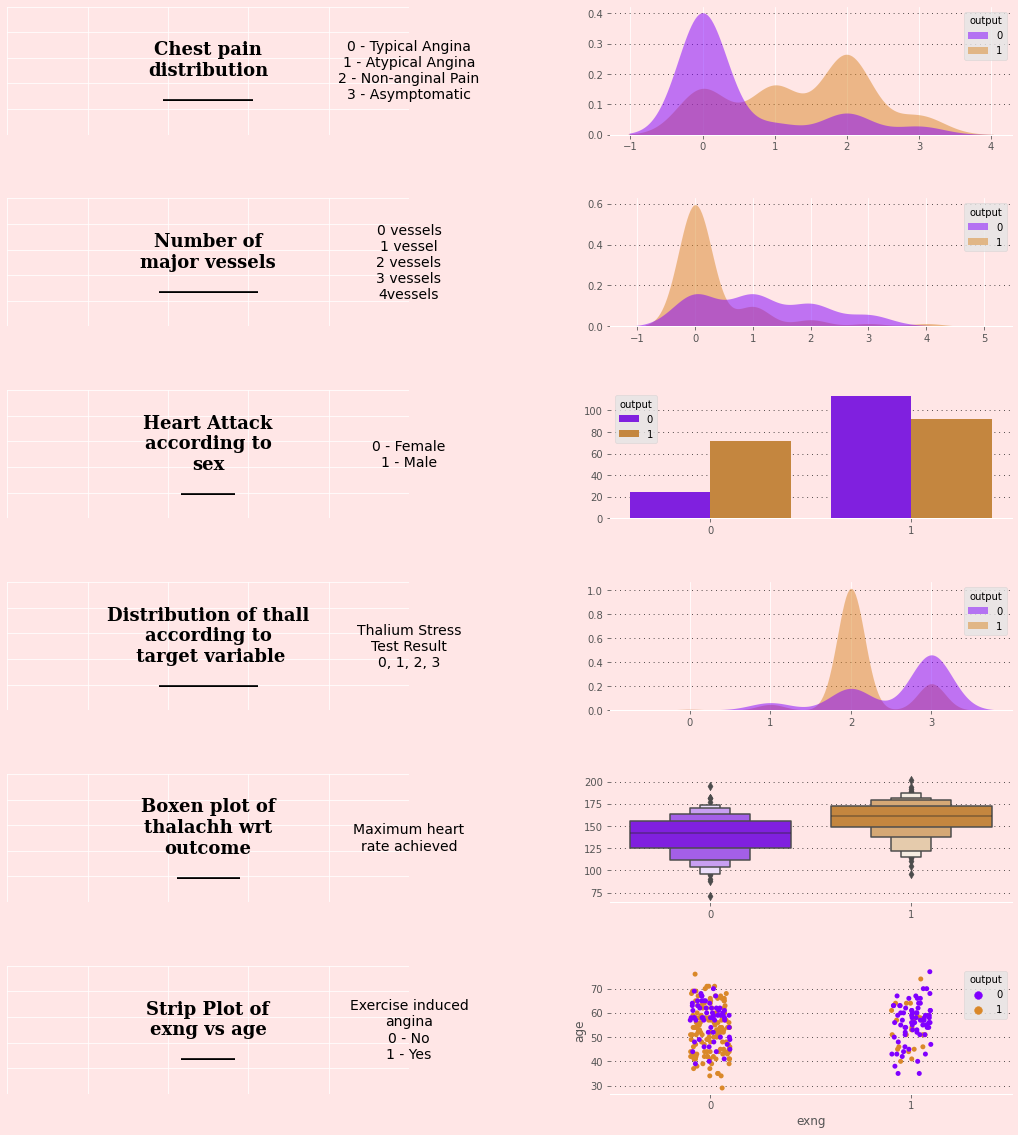

In [ ]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

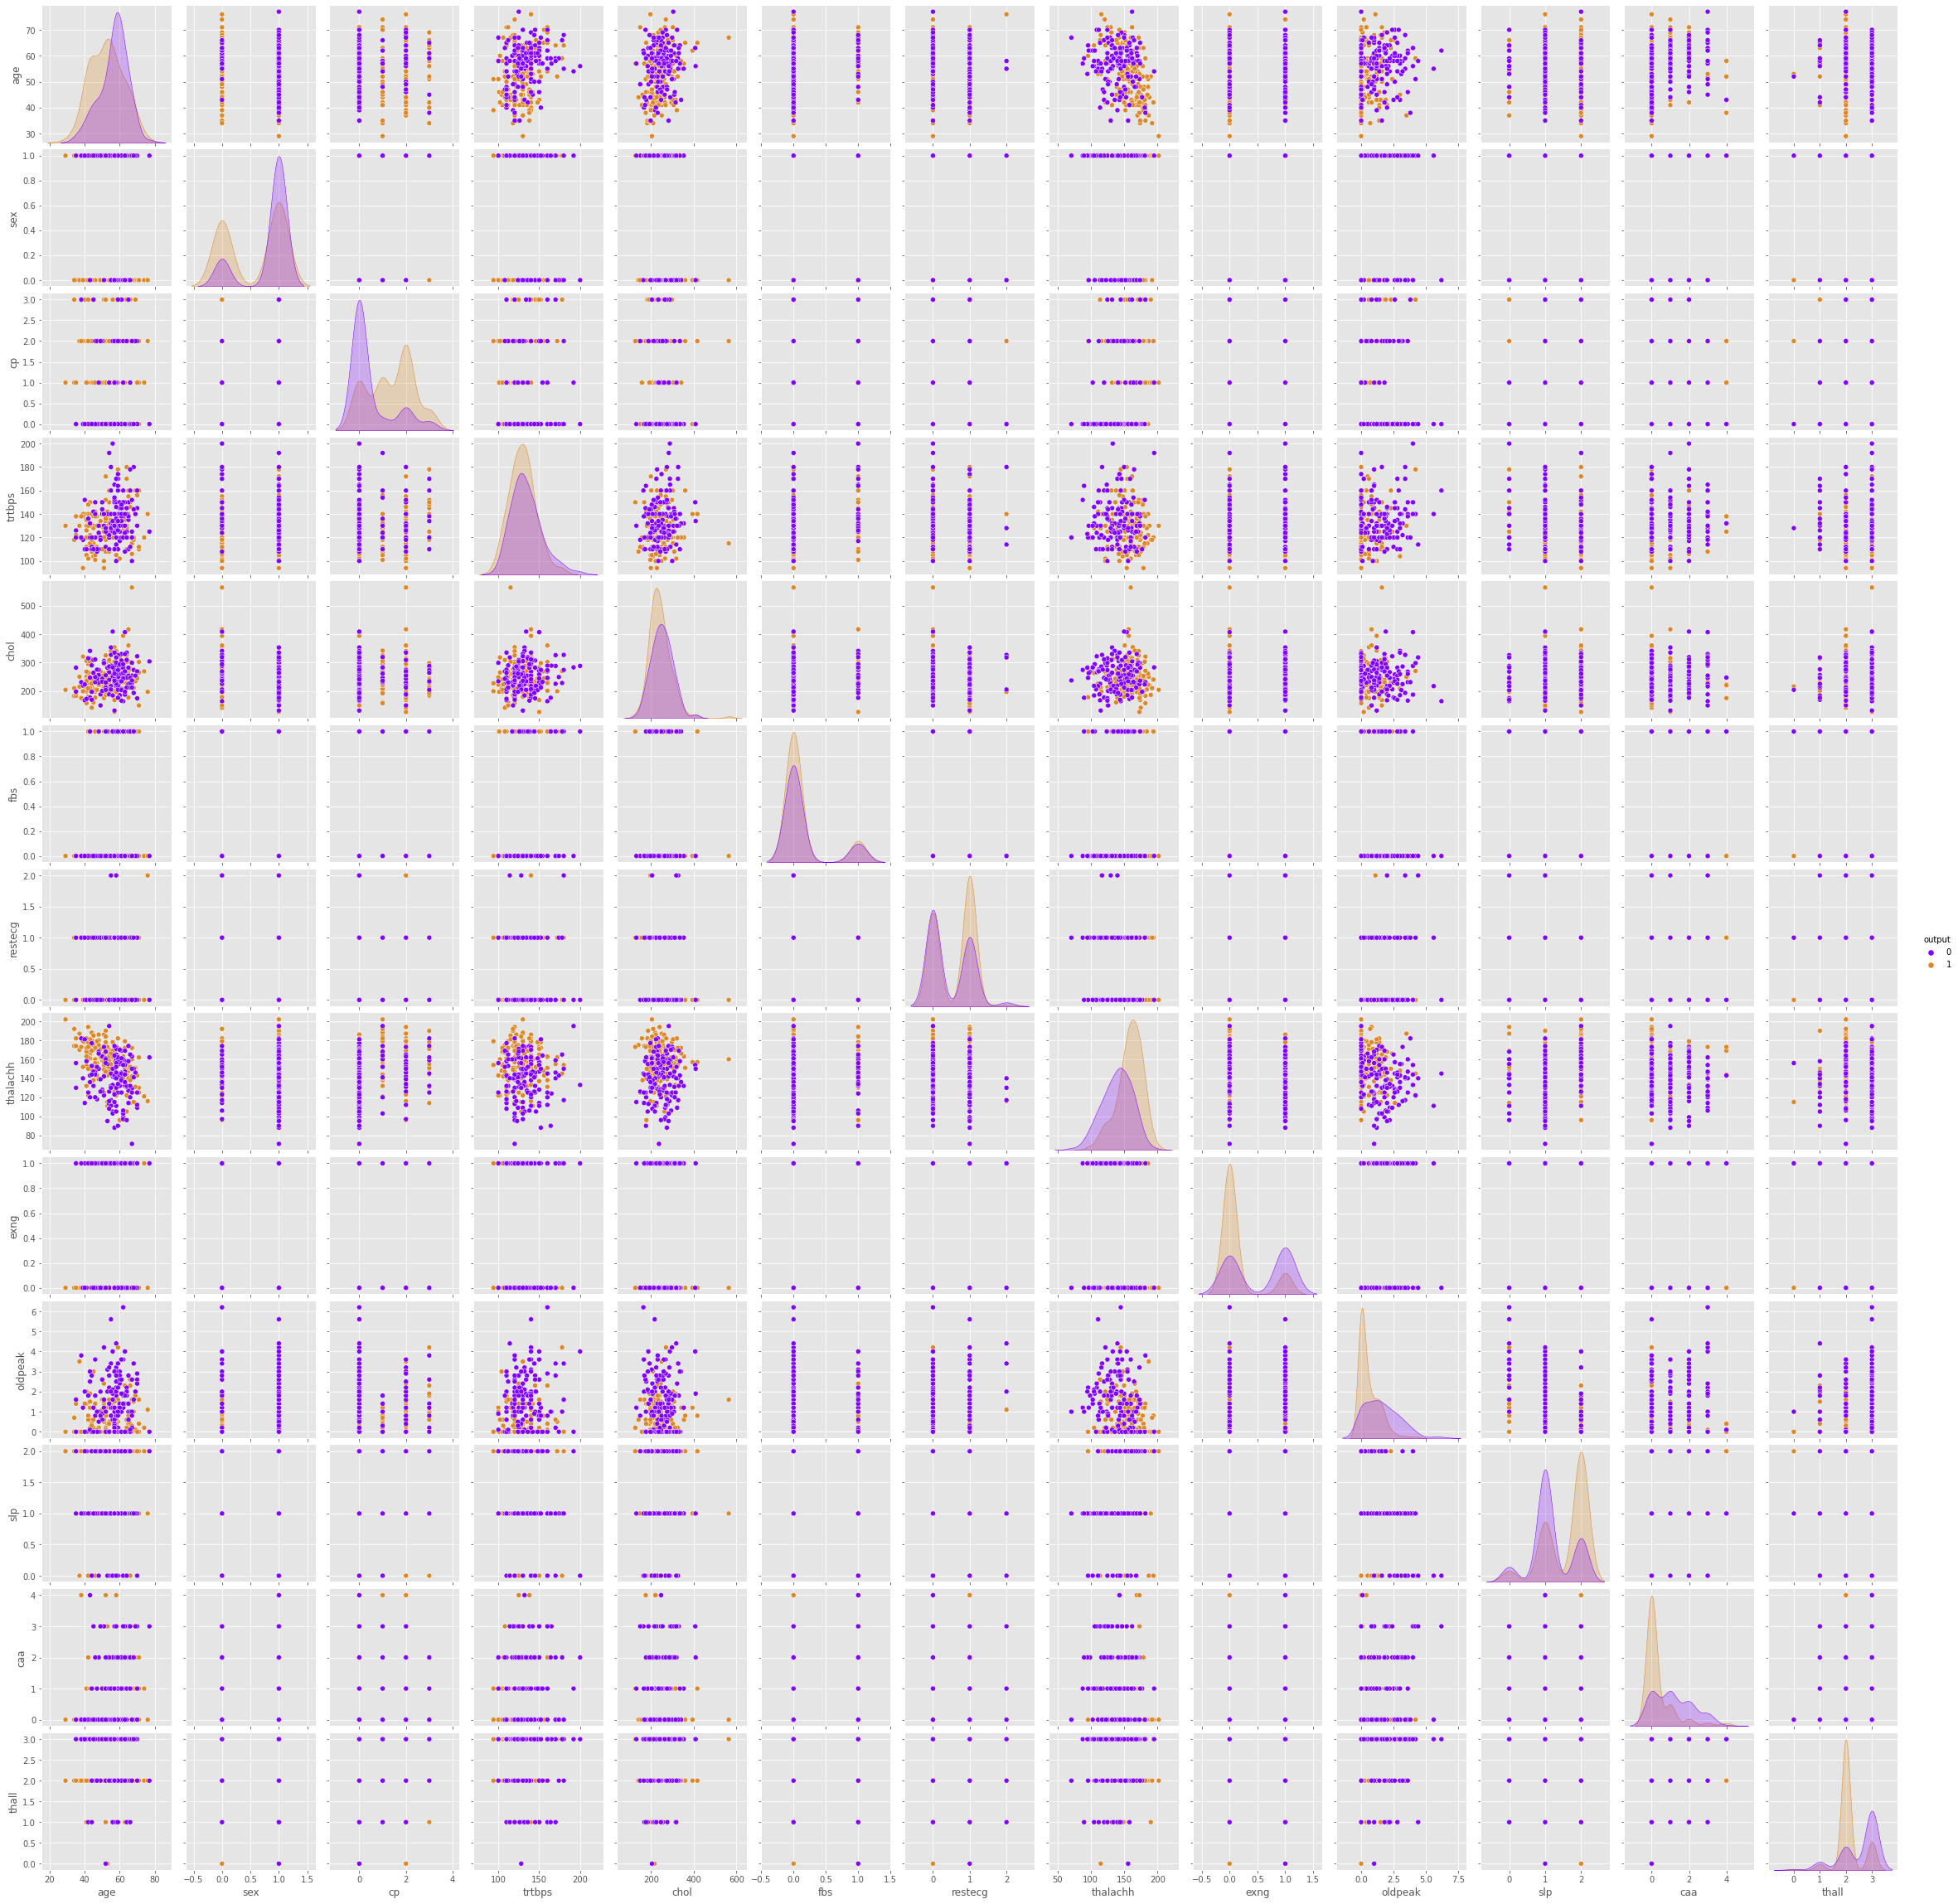

In [ ]:
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

# Analysis Results

After make some analysis , visual graph and explore the data set , I see some results .

### The vast majority of patients are between 50 and 60.

* Maybe when increasing old years have more chance of heart attack

### Gender of the patients:

* 68.3% are Male

* 31.7% are Female

### Chest Pain type chest pain type:

* Asymptomatic 47.2%

* Typical angina 16.5%

* Atypical angina 28.7 %

* Non-anginal pain 7.6 %

### (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false):

* 0 = 85.1 %

* 1 = 14.9 %

### Resting electrocardiographic results:

* Normal = 48.5%

* Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) = 50.2 %

* Showing probable or definite left ventricular hypertrophy by Estes' criteria = 1.3 %

### Target Variable - output:

* More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent

### Creating a copy of df

In [ ]:
df1 = df

### Encoding the categorical columns

In [ ]:
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

### Defining the features and target

In [ ]:
X = df1.drop(['output'],axis=1)
y = df1[['output']]

### Scaling the continuous featuree

In [ ]:
scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1.0,caa_2.0,caa_3.0,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1.0,slp_2.0,thall_1.0,thall_2.0,thall_3.0
0,0.615385,0.75,-0.111111,-0.09375,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.384615,0.00,0.158730,1.06250,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.076923,0.00,-0.571429,0.59375,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.076923,-0.50,-0.063492,0.78125,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.153846,-0.50,1.809524,0.31250,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ", X_test.shape)
print("The shape of y_train is      ", y_train.shape)
print("The shape of y_test is       ", y_test.shape)

The shape of X_train is       (240, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (240, 1)
The shape of y_test is        (61, 1)


In [ ]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
XGB = XGBClassifier()
SVR=SVC()

In [ ]:
li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LogisticRegression() : 85.24590163934425
DecisionTreeClassifier() : 72.1311475409836
RandomForestClassifier() : 81.9672131147541
KNeighborsClassifier() : 83.60655737704919
MLPClassifier() : 85.24590163934425
KNeighborsClassifier() : 83.60655737704919
XGBClassifier() : 81.9672131147541
SVC() : 80.32786885245902


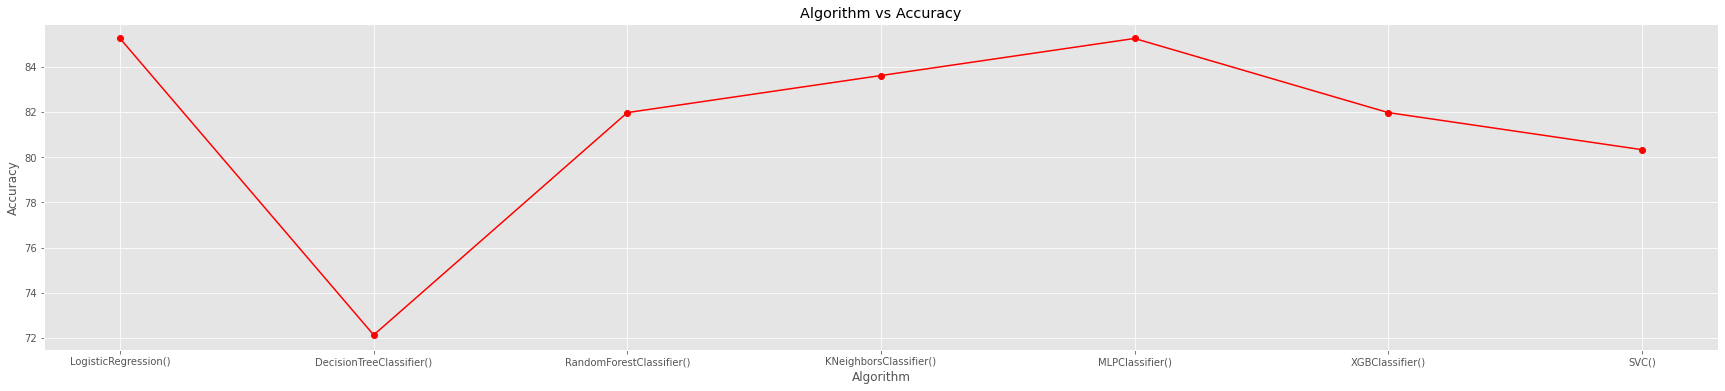

In [ ]:
plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(list(d.keys()),list(d.values()),marker='o',color='red')
plt.show()

### So , the best model Logistic Regression